In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
df_bank_info = pd.read_csv('final.csv')

In [3]:
df_bank_info.head()

cust_id  income  age  nbr_children gender  marital_status  \
0  1362480   50890   33             2     M                2   
1  1362484   10053   42             0     F                1   
2  1362487    6605   71             0     M                2   
3  1362489   55888   35             2     F                3   
4  1362508    9802   66             0     F                3   

                                  city_name state_code  total_interest  \
0  New York City                                  NY            361.26   
1  Denver                                         CO             14.81   
2  Los Angeles                                    CA             13.63   
3  Nashville                                      TN            248.77   
4  St Louis                                       MO             80.94   

   savings_balance  checking_balance  credit_balance  net_worth  
0          1187.97             86.86           20.00    1254.83  
1          2122.17             95.32          369.72    1847.77  
2            12.89           1401.21         1548.23    -134.13  
3           373.65            125.43           20.00     479.08  
4           255.11             75.11         1072.17    -741.95

In [4]:
saving_trans = pd.read_csv('df_saving_tran_cleaned.csv')

In [5]:
saving_trans = saving_trans[['cust_id','tran_id']].groupby('cust_id').count()

In [6]:
saving_trans.reset_index(inplace=True)

In [7]:
saving_trans = saving_trans.rename(columns={'tran_id': 'saving_trans'})

In [8]:
df_bank_info = pd.merge(left=df_bank_info, right=saving_trans, left_on='cust_id', right_on='cust_id')

In [9]:
df_bank_info.head()

cust_id  income  age  nbr_children gender  marital_status  \
0  1362480   50890   33             2     M                2   
1  1362484   10053   42             0     F                1   
2  1362487    6605   71             0     M                2   
3  1362489   55888   35             2     F                3   
4  1362508    9802   66             0     F                3   

                                  city_name state_code  total_interest  \
0  New York City                                  NY            361.26   
1  Denver                                         CO             14.81   
2  Los Angeles                                    CA             13.63   
3  Nashville                                      TN            248.77   
4  St Louis                                       MO             80.94   

   savings_balance  checking_balance  credit_balance  net_worth  saving_trans  
0          1187.97             86.86           20.00    1254.83            26  
1          2122.17             95.32          369.72    1847.77            33  
2            12.89           1401.21         1548.23    -134.13            19  
3           373.65            125.43           20.00     479.08            22  
4           255.11             75.11         1072.17    -741.95            33

In [10]:
checking_trans = pd.read_csv('df_checking_tran_clean.csv')
checking_trans = checking_trans[['cust_id','tran_id']].groupby('cust_id').count()
checking_trans.reset_index(inplace=True)
checking_trans = checking_trans.rename(columns={'tran_id': 'checking_trans'})
df_bank_info = pd.merge(left=df_bank_info, right=checking_trans, left_on='cust_id', right_on='cust_id')

credit_trans = pd.read_csv('df_credit_tran_clean.csv')
credit_trans = credit_trans[['cust_id','tran_id']].groupby('cust_id').count()
credit_trans.reset_index(inplace=True)
credit_trans = credit_trans.rename(columns={'tran_id': 'credit_trans'})
df_bank_info = pd.merge(left=df_bank_info, right=credit_trans, left_on='cust_id', right_on='cust_id')

In [11]:
df_bank_info['total_trans'] = df_bank_info['saving_trans'] + df_bank_info['checking_trans'] + df_bank_info['credit_trans']

In [12]:
df_bank_info.head()

cust_id  income  age  nbr_children gender  marital_status  \
0  1362480   50890   33             2     M                2   
1  1362484   10053   42             0     F                1   
2  1362487    6605   71             0     M                2   
3  1362489   55888   35             2     F                3   
4  1362508    9802   66             0     F                3   

                                  city_name state_code  total_interest  \
0  New York City                                  NY            361.26   
1  Denver                                         CO             14.81   
2  Los Angeles                                    CA             13.63   
3  Nashville                                      TN            248.77   
4  St Louis                                       MO             80.94   

   savings_balance  checking_balance  credit_balance  net_worth  saving_trans  \
0          1187.97             86.86           20.00    1254.83            26   
1          2122.17             95.32          369.72    1847.77            33   
2            12.89           1401.21         1548.23    -134.13            19   
3           373.65            125.43           20.00     479.08            22   
4           255.11             75.11         1072.17    -741.95            33   

   checking_trans  credit_trans  total_trans  
0              99            32          157  
1              99            55          187  
2              52            32          103  
3              99            35          156  
4              99            87          219

In [14]:
# elbow rule df_bank_info
df_bank_info['marital_status'] = df_bank_info['marital_status'].astype('category')
segmentation_cols = ['income','age','nbr_children','gender', 'marital_status', 'total_interest','net_worth','total_trans']
df_seg = df_bank_info[segmentation_cols]
df_seg = pd.get_dummies(df_seg, drop_first=True)
df_seg.head()

income  age  nbr_children  total_interest  net_worth  total_trans  \
0   50890   33             2          361.26    1254.83          157   
1   10053   42             0           14.81    1847.77          187   
2    6605   71             0           13.63    -134.13          103   
3   55888   35             2          248.77     479.08          156   
4    9802   66             0           80.94    -741.95          219   

   gender_M   marital_status_2  marital_status_3  marital_status_4  
0          1                 1                 0                 0  
1          0                 0                 0                 0  
2          1                 1                 0                 0  
3          0                 0                 1                 0  
4          0                 0                 1                 0

In [15]:
scaler = MinMaxScaler()
df_seg_scaled = pd.DataFrame(scaler.fit_transform(df_seg), columns = df_seg.columns)

In [16]:
# elbow rule function
def plot_inertia(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()

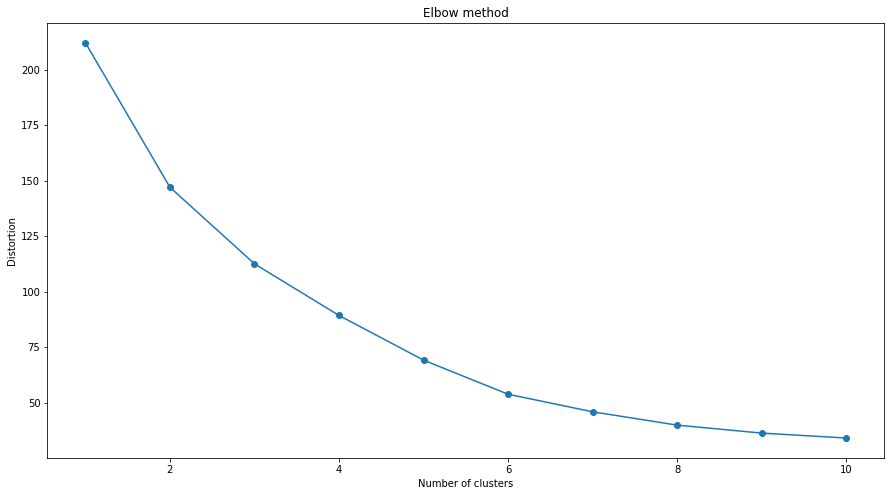

In [18]:
# elbow plot df_bank_info
plot_inertia(df_seg_scaled)

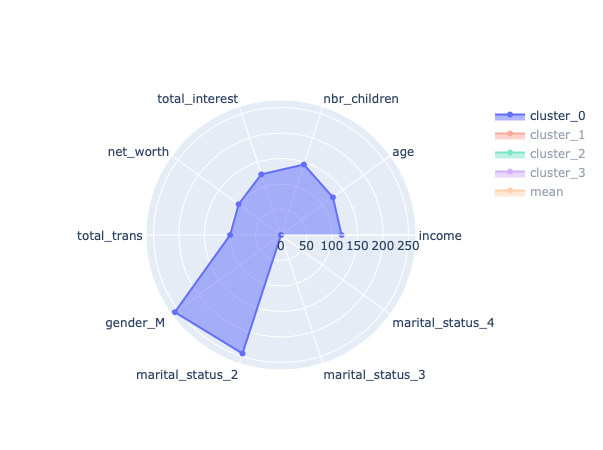

In [19]:

#assign cluster to customers
df_seg_scaled['cluster'] = KMeans(n_clusters=4, n_init=10).fit_predict(df_seg_scaled)
# clusters size
df_seg_scaled['cluster'].value_counts()
# data to radar chart
df_radar = df_seg_scaled.groupby('cluster').mean().divide(df_seg_scaled.drop('cluster',axis=1).mean())*100

def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()
plot_radar_chart(df_radar)

In [20]:
df_radar.head()

income         age  nbr_children  total_interest   net_worth  \
cluster                                                                     
0        118.813127  125.861917    145.345345      125.127531  102.667581   
1         82.990516   84.406598     66.006316       95.052410   99.101597   
2         91.850062  123.686348    130.107527       94.802441   96.733710   
3        122.316247   80.975230     89.105480       96.807417  103.176703   

         total_trans   gender_M   marital_status_2  marital_status_3  \
cluster                                                                
0          99.812715  257.446809        244.444444          0.000000   
1          97.487618    0.000000          0.000000        164.147287   
2         101.832496    0.000000        244.444444          0.000000   
3         101.918942  257.446809          0.000000        176.900585   

         marital_status_4  
cluster                    
0                0.000000  
1              167.078488  
2                0.000000  
3              172.478070

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_seg_scaled), columns = ['PC1', 'PC2'])
df_pca['cluster'] = df_seg_scaled['cluster']

In [23]:
df_pca.head()

PC1       PC2  cluster
0  1.570756 -0.589444        0
1  0.544673  0.525091        1
2  1.587950 -0.626826        0
3  0.510912  0.668396        1
4  0.522555  0.632297        1

In [24]:
def plot_PCA(df):
    data = []
    for cluster in df.cluster.unique():
        to_plot = df[df['cluster'] == cluster]
        data.append(go.Scatter(x=to_plot['PC1'], 
                               y=to_plot['PC2'], 
                               mode='markers', name = f'cluster_{cluster}'))
    layout = go.Layout(title="PCA",
                       xaxis_title="PC1",
                       yaxis_title="PC2",)
    fig = go.Figure(data=data,layout=layout)
    fig.show()


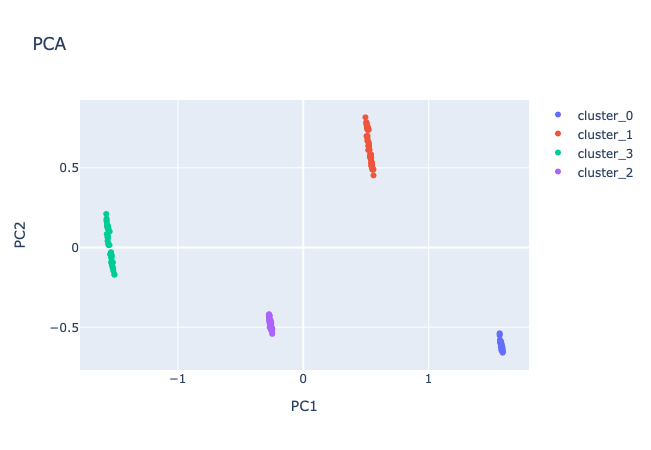

In [25]:
plot_PCA(df_pca)